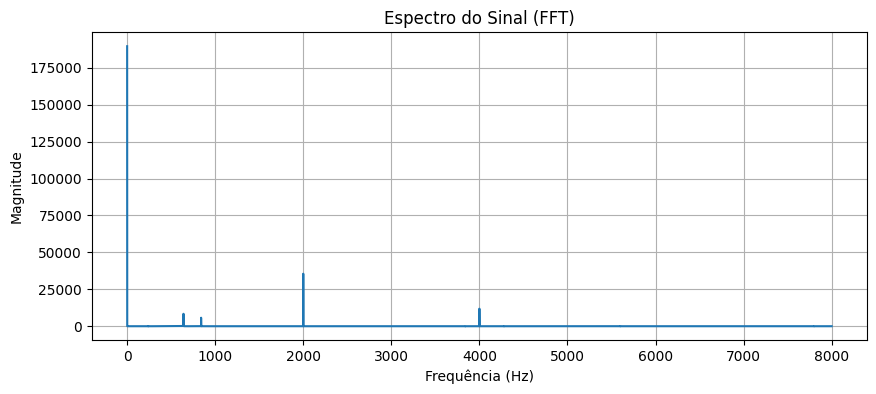

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Carrega o sinal
fs, x = wavfile.read('sinal_1.wav')  # fs = 16 kHz (taxa de amostragem)
x = x / np.max(np.abs(x))  # Normaliza o sinal

# Calcula a FFT
N = len(x)
X = np.fft.fft(x)
freqs = np.fft.fftfreq(N, d=1/fs)[:N//2]  # Frequências positivas (0 a fs/2)

# Plot do espectro
plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(X[:N//2]))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
#plt.xlim([500, 1000])
plt.title('Espectro do Sinal (FFT)')
plt.grid(True)
plt.show()

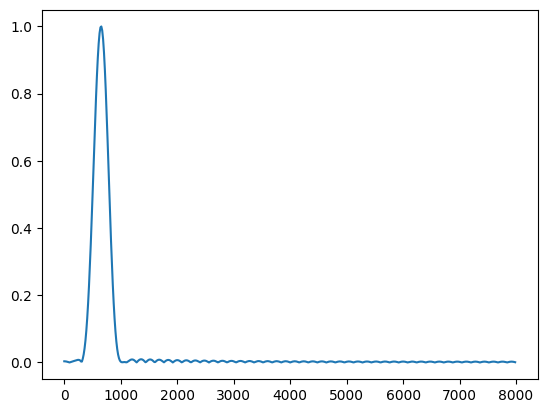

In [37]:
from scipy.signal import firwin, freqz
M=100
# Filtro para 500 Hz
f_low1, f_high1 = 600, 700
h1 = firwin(M, [f_low1, f_high1], pass_zero=False, fs=fs)

# Resposta em frequência
w1, H1 = freqz(h1, fs=fs)
plt.plot(w1, np.abs(H1), label='Filtro 500 Hz')

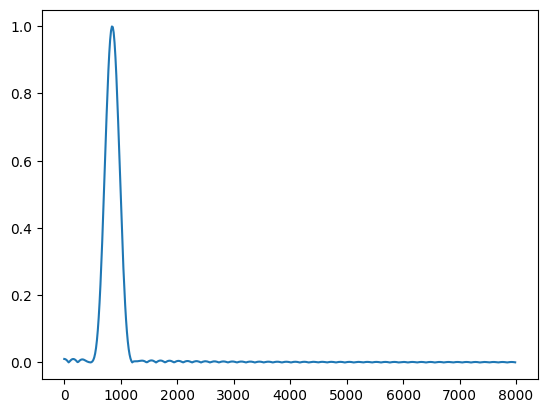

In [38]:
from scipy.signal import firwin, freqz
M=100
# Filtro para 500 Hz
f_low1, f_high1 = 800, 900
h2 = firwin(M, [f_low1, f_high1], pass_zero=False, fs=fs)

# Resposta em frequência
w1, H2 = freqz(h2, fs=fs)
plt.plot(w1, np.abs(H2), label='Filtro 500 Hz')

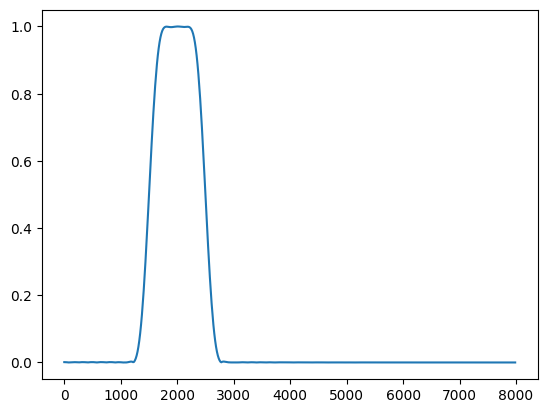

In [39]:
from scipy.signal import firwin, freqz
M=100
# Filtro para 500 Hz
f_low1, f_high1 = 1500, 2500
h3 = firwin(M, [f_low1, f_high1], pass_zero=False, fs=fs)

# Resposta em frequência
w1, H3 = freqz(h3, fs=fs)
plt.plot(w1, np.abs(H3), label='Filtro 500 Hz')

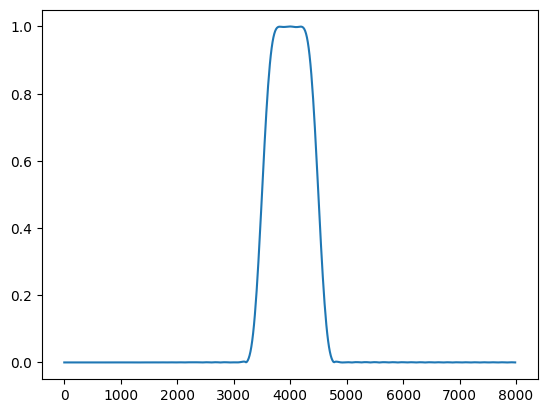

In [40]:
f_low2, f_high2 = 3500, 4500
h4 = firwin(M, [f_low2, f_high2], pass_zero=False, fs=fs)

w2, H4 = freqz(h4, fs=fs)
plt.plot(w2, np.abs(H4), label='Filtro 1500 Hz')

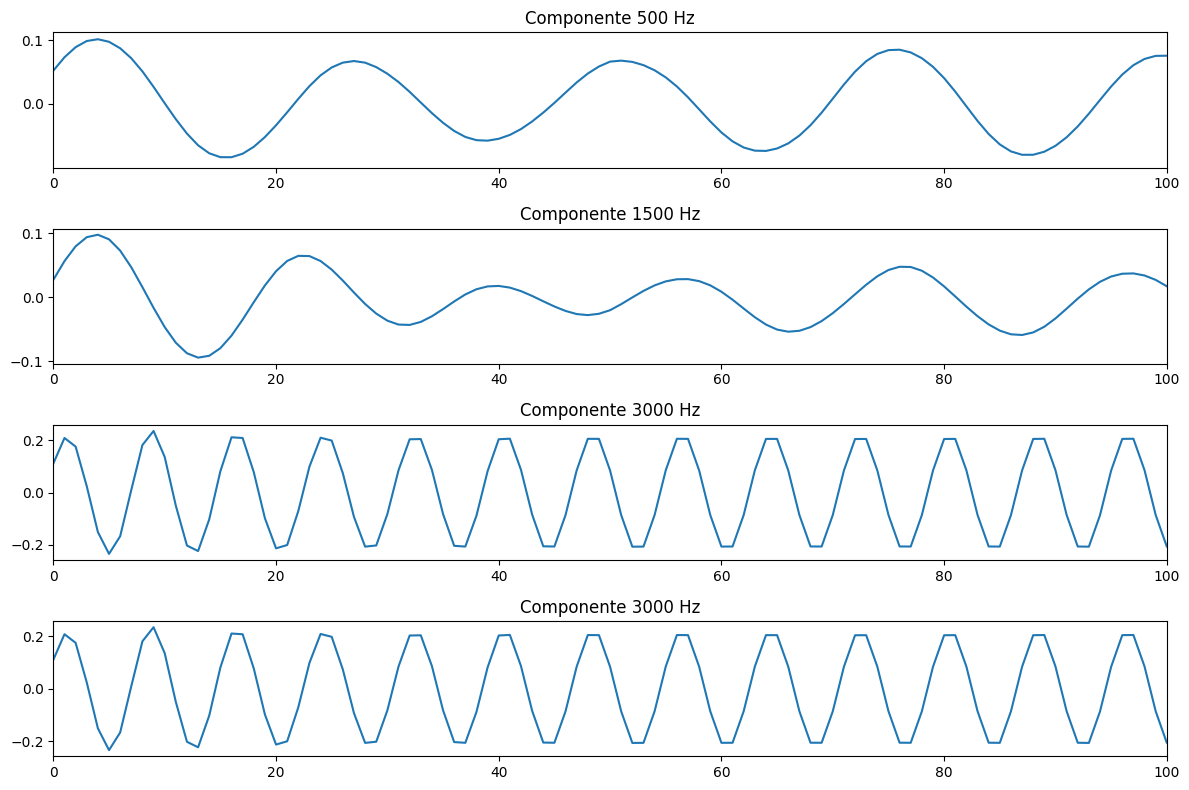

In [41]:
# Filtragem (convolução)
y1 = np.convolve(x, h1, mode='same')  
y2 = np.convolve(x, h2, mode='same') 
y3 = np.convolve(x, h3, mode='same') 
y4 = np.convolve(x, h4, mode='same') 

# Plot dos sinais separados
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(y1)
plt.title('Componente 500 Hz')
plt.xlim([0, 100])

plt.subplot(4, 1, 2)
plt.plot(y2)
plt.title('Componente 1500 Hz')
plt.xlim([0, 100])

plt.subplot(4, 1, 3)
plt.plot(y3)
plt.title('Componente 3000 Hz')
plt.xlim([0, 100])

plt.subplot(4, 1, 4)
plt.plot(y3)
plt.title('Componente 3000 Hz')
plt.xlim([0, 100])

plt.tight_layout()
plt.show()